In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import copy
import math
from collections import OrderedDict
# import seaborn as sns

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client


netcdf_index loaded.


In [2]:
## To implement, use:
## dask-scheduler
## dask-worker tcp://10.0.64.4:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
client=Client('tcp://10.0.64.4:8786', local_dir='/local/g40/amh157')
client

Client Scheduler: tcp://10.0.64.4:8786 Dashboard: http://10.0.64.4:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.00 GB


In [5]:
def global_scalar(variable):
    expt = 'access-om2-01/01deg_jra55v13_ryf8485_spinup6'
    darray = cc.get_nc_variable(expt,'ocean_scalar.nc',variable,
                                time_units='days since 1900-01-01',n=350)
    annual_average = darray.resample(time='3M').mean()
    annual_average.plot(label='spinup6')
    
    expt = '01deg_jra55v13_ryf8485_spinup7'
    darray = cc.get_nc_variable(expt,'ocean_scalar.nc',
                                    variable)
    annual_average = darray.resample(time='3M').mean()
    annual_average.plot(label='spinup7')
    
    
    expt = '01deg_jra55v13_ryf8485_spinup9'
    darray = cc.get_nc_variable(expt,'ocean_scalar.nc',
                                    variable)
    annual_average = darray.resample(time='3M').mean()
    annual_average.plot(label='spinup9')

    plt.gca().autoscale()

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cook

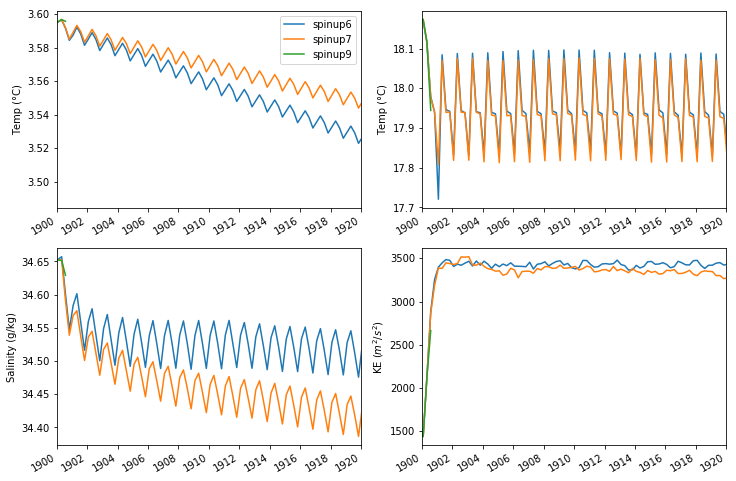

In [6]:
%%time
plt.figure(figsize=(12,8))

#############
## FIRST PLOT
ax = plt.subplot(221)
global_scalar('temp_global_ave')
plt.legend()
plt.xlabel('')
plt.ylabel('Temp (°C)')
ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

##############
## SECOND PLOT
ax = plt.subplot(222)
global_scalar('temp_surface_ave')
plt.xlabel('')
plt.ylabel('Temp (°C)')
ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

#############
## THIRD PLOT
ax = plt.subplot(223)
global_scalar('salt_surface_ave')
plt.xlabel('')
plt.ylabel('Salinity (g/kg)')
ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

#############
##FOURTH PLOT
ax = plt.subplot(224)
global_scalar('ke_tot')
plt.xlabel('')
plt.ylabel('KE ($m^2/s^2$)')
ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])